### Shallow Vs Deep Learning Methodology to Uncover patterns of Terrorism

In [244]:
# required modules 

In [245]:
# Data Libraries 
import pandas as pd 
import numpy as np

# plotting libraries 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns

#predictive modelling 
import sklearn 
from tensorflow.keras.layers import Dense, Activation, BatchNormalization

# ignore warnings 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [246]:
# data path 
# MacOS
# abspath = './Data/Data.csv'
# metadata = './Data/terrorism_metadata.csv'
# Windows 
abspath = r"C:\Users\91800\Desktop\terrorism-analysis\Data\Data.csv"
metadata = r"C:\Users\91800\Desktop\terrorism-analysis\Data\terrorism_metadata.csv"

In [247]:
# Functional Meta-Data --> usage - meta_data['column-name']
meta = pd.read_csv(metadata)
meta = meta.drop(meta.columns[2:],axis=1)
meta_data = {}
for x,y in zip(list(meta['Column']),list(meta['Desc'])):
    meta_data[x] = y

# meta_data

In [248]:
# Data 
data = pd.read_csv(abspath,encoding='latin1',low_memory=False)

In [249]:
data = data.drop('Unnamed: 0',axis=1) # dropping the redundant column

In [250]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,...,target1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill,propextent
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,...,Julio Guzman,58.0,Dominican Republic,MANO-D,Unknown,NaN,13,Unknown,1.0,NaN
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Mexico city,...,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,Unknown,7.0,13,Unknown,0.0,NaN
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Unknown,...,Employee,217.0,United States,Unknown,Unknown,NaN,13,Unknown,1.0,NaN
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Athens,...,U.S. Embassy,217.0,United States,Unknown,Unknown,NaN,6,Explosives,NaN,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,U.S. Consulate,217.0,United States,Unknown,Unknown,NaN,8,Incendiary,NaN,NaN


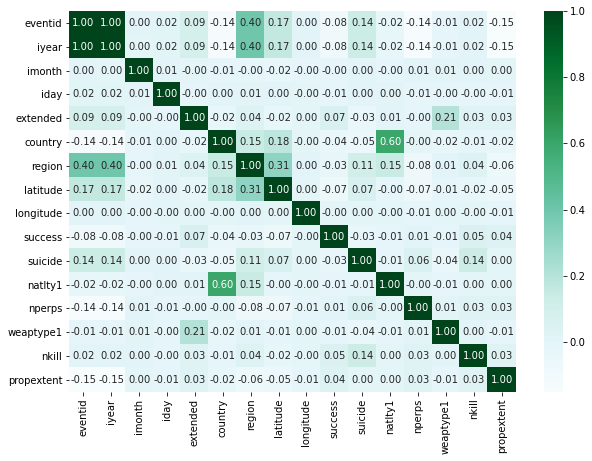

In [251]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, cmap='BuGn',fmt='.2f')

In [252]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'city', 'provstate', 'latitude',
       'longitude', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'motive', 'nperps', 'weaptype1', 'weaptype1_txt', 'nkill',
       'propextent'],
      dtype='object')

In [253]:
data = data.drop('eventid',axis=1)

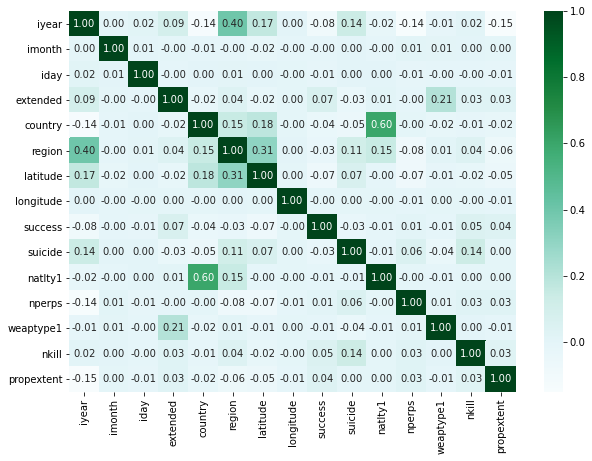

In [254]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, cmap='BuGn',fmt='.2f')

In [255]:
meta_data

{'eventid': 'Unique id for each event',
 'iyear': 'Year of incident',
 'imonth': 'Month of incident',
 'iday': 'Numeric day on which the incident occurred.',
 'extended': 'Yes/No for for whether the incedent extended for more than 24 hours.',
 'country': 'Country code',
 'country_txt': 'Country where the incident took place',
 'region ': 'Region code based on 12 regions.',
 'region_txt': 'Region in which the incident occurred',
 'city': 'Name of the city/village/town in which the incident took place.',
 'provstate': 'Name of the first order subnational region during the time of the event',
 'latitude': 'Coordinate',
 'longitude': 'Coordinate',
 'location': '*Exact* location where the incident took place',
 'summary': 'synopsis',
 'success': 'Yes/No for the success of the terrorist strike',
 'suicide': 'Yes/No for whether the attack was a suicide attack',
 'attacktype1_txt': 'The general method of attack/ the tactics used.',
 'targettype1_txt': 'The general category of victim of the att

In [256]:
data.head(4)

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,provstate,...,target1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill,propextent
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,Unknown,...,Julio Guzman,58.0,Dominican Republic,MANO-D,Unknown,NaN,13,Unknown,1.0,NaN
1,1970,0,0,0,130,Mexico,1,North America,Mexico city,Federal,...,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,Unknown,7.0,13,Unknown,0.0,NaN
2,1970,1,0,0,160,Philippines,5,Southeast Asia,Unknown,Tarlac,...,Employee,217.0,United States,Unknown,Unknown,NaN,13,Unknown,1.0,NaN
3,1970,1,0,0,78,Greece,8,Western Europe,Athens,Attica,...,U.S. Embassy,217.0,United States,Unknown,Unknown,NaN,6,Explosives,NaN,NaN


In [257]:
data.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'city', 'provstate', 'latitude', 'longitude',
       'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'motive', 'nperps', 'weaptype1', 'weaptype1_txt', 'nkill',
       'propextent'],
      dtype='object')

In [258]:
delcols = ['longitude','latitude','country_txt',
           'region_txt','city','provstate','natlty1_txt'
            ,'weaptype1_txt','propextent',
           'attacktype1_txt','targsubtype1_txt','corp1']

In [259]:
df = data.drop(delcols, axis=1)

### Terrorist Organisations 
***
This predictive modeling can only be achieved when the data is in context of only ***one*** **Gname/Organisation**, so the following procedure is a trail to determine whether a network could generalise well enough in context of one Gname 

In [260]:
df.groupby('gname')['success'].sum().sort_values(ascending=False)

gname
Unknown                                                       71748
Taliban                                                        6680
Islamic State of Iraq and the Levant (ISIL)                    4759
Shining Path (SL)                                              4337
Farabundo Marti National Liberation Front (FMLN)               3317
                                                              ...  
Temple Mount Faithful Movement                                    0
Militant Welsh                                                    0
All Karanataka Youth Council                                      0
Janatantrik Terai Madhes Mukti Party- Bhagat Singh (JTMMP)        0
GP II                                                             0
Name: success, Length: 3537, dtype: int64

#### *Taliban 

In [261]:
taliban = df[df['gname'] == 'Taliban']

In [262]:
taliban.shape

(7478, 16)

In [263]:
taliban

,iyear,imonth,iday,extended,country,region,success,suicide,targtype1_txt,target1,natlty1,gname,motive,nperps,weaptype1,nkill
59040,1995,4,20,1,4,6,1,0,Police,Federal Investigation Agency,153.0,Taliban,Unknown,NaN,13,0.0
60014,1995,8,3,0,4,6,1,0,Airports & Aircraft,Russian Il-76 Cargo Aircraft,167.0,Taliban,Unknown,NaN,6,0.0
60462,1995,9,21,1,4,6,1,0,Airports & Aircraft,Boeing 727,4.0,Taliban,Unknown,NaN,6,0.0
60786,1995,10,25,0,4,6,0,0,Airports & Aircraft,ICRC- Chartered Aircraft,199.0,Taliban,Unknown,NaN,6,0.0
71682,2001,1,7,1,4,6,1,0,Private Citizens & Property,Civilians living in the vicinity of Yakawlang,4.0,Taliban,"Specific motive is unknown; however, survivors...",-99.0,5,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181600,2017,12,28,0,4,6,1,0,Police,Fifth Brigade Officers,4.0,Taliban,Unknown,-99.0,13,4.0
181619,2017,12,28,0,4,6,1,0,Police,Police Checkpoint,4.0,Taliban,Unknown,-99.0,13,3.0
181651,2017,12,30,0,4,6,1,0,Military,Checkpoints,4.0,Taliban,Unknown,-99.0,13,11.0
181676,2017,12,31,0,4,6,1,0,Police,Vehicle,4.0,Taliban,Unknown,-99.0,6,5.0


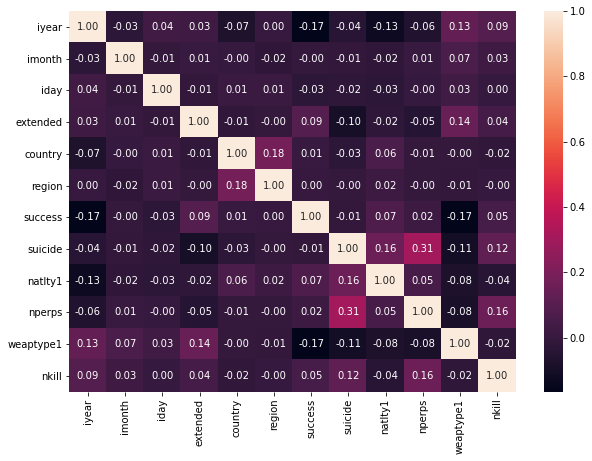

In [264]:
plt.figure(figsize=(10,7))
sns.heatmap(taliban.corr(), annot=True, fmt='.2f')

In [265]:
taliban = taliban.drop('target1',axis=1)

In [266]:
from sklearn.preprocessing import LabelEncoder

In [267]:
label_encode = LabelEncoder()

In [268]:
x = label_encode.fit_transform(taliban['targtype1_txt'])

In [269]:
taliban.isna().sum()

iyear              0
imonth             0
iday               0
extended           0
country            0
region             0
success            0
suicide            0
targtype1_txt      0
natlty1          234
gname              0
motive             0
nperps           545
weaptype1          0
nkill            278
dtype: int64

In [270]:
taliban['motive']

59040                                               Unknown
60014                                               Unknown
60462                                               Unknown
60786                                               Unknown
71682     Specific motive is unknown; however, survivors...
                                ...                        
181600                                              Unknown
181619                                              Unknown
181651                                              Unknown
181676                                              Unknown
181683    The specific motive is unknown; however, sourc...
Name: motive, Length: 7478, dtype: object

In [271]:
# del motive, 

In [272]:
taliban = taliban.drop('motive',axis=1)

In [273]:
for col in taliban.columns:
    try:
        print(meta_data[col])
    except:
        pass

Year of incident
Month of incident
Numeric day on which the incident occurred.
Yes/No for for whether the incedent extended for more than 24 hours.
Country code
Yes/No for the success of the terrorist strike
Yes/No for whether the attack was a suicide attack
Name of the group that carried out the attack.
Weapon code.
Total number of confirmed kills in the incident.


In [274]:
taliban['targtype1_txt'] = label_encode.fit_transform(taliban['targtype1_txt'])

In [275]:
taliban = taliban.drop('gname',axis=1)

In [276]:
# Train and Validation sets on for Taliban 

In [277]:
taliban.head()

,iyear,imonth,iday,extended,country,region,success,suicide,targtype1_txt,natlty1,nperps,weaptype1,nkill
59040,1995,4,20,1,4,6,1,0,10,153.0,NaN,13,0.0
60014,1995,8,3,0,4,6,1,0,0,167.0,NaN,6,0.0
60462,1995,9,21,1,4,6,1,0,0,4.0,NaN,6,0.0
60786,1995,10,25,0,4,6,0,0,0,199.0,NaN,6,0.0
71682,2001,1,7,1,4,6,1,0,11,4.0,-99.0,5,150.0


In [278]:
taliban.isna().sum()

iyear              0
imonth             0
iday               0
extended           0
country            0
region             0
success            0
suicide            0
targtype1_txt      0
natlty1          234
nperps           545
weaptype1          0
nkill            278
dtype: int64

In [279]:
taliban = taliban.dropna()

In [280]:
taliban

,iyear,imonth,iday,extended,country,region,success,suicide,targtype1_txt,natlty1,nperps,weaptype1,nkill
71682,2001,1,7,1,4,6,1,0,11,4.0,-99.0,5,150.0
73116,2001,9,10,0,4,6,1,1,5,4.0,2.0,6,3.0
73971,2002,4,13,0,4,6,0,0,7,217.0,20.0,5,5.0
74412,2002,8,0,0,4,6,1,0,2,4.0,-99.0,6,0.0
75185,2003,2,25,0,4,6,1,0,5,4.0,-99.0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181600,2017,12,28,0,4,6,1,0,10,4.0,-99.0,13,4.0
181619,2017,12,28,0,4,6,1,0,10,4.0,-99.0,13,3.0
181651,2017,12,30,0,4,6,1,0,7,4.0,-99.0,13,11.0
181676,2017,12,31,0,4,6,1,0,10,4.0,-99.0,6,5.0


### Feature Data and Target Sets 

In [281]:
# success, suicide, targettype_txt

In [282]:
# success
X_success = taliban.drop('success',axis=1)
y_success = taliban['success']

# suicide
X_suicide = taliban.drop('suicide',axis=1)
y_suicide = taliban['suicide']

# targettype_txt
X_target = taliban.drop('targtype1_txt',axis=1)
y_target = taliban['targtype1_txt']

In [283]:
# success 
Sets = [(X_success, y_success), (X_suicide, y_suicide), (X_target, y_target)]

In [284]:
# 3 sets
for x_train, y_train in Sets:
    print(x_train.shape, y_train.shape)

(6433, 12) (6433,)
(6433, 12) (6433,)
(6433, 12) (6433,)


### Details 
There are three pairs of Feature Data and Target label, `success, suicide, target_type` we are essentially training a network to predict 3 labels/targets
***
### Instructions Further
***
* The ___3 pairs___ of feature data are in a list of tuples called `Sets` Extract each set iteratively or manually 
* Normalise the X_train, y_train and X_test, y_test pairs with either `MinMaxScaler` or `StandardScaler`
* Build a Network with `tensorflow.keras` and Build the Model

In [285]:
from sklearn.model_selection import train_test_split

In [286]:
 X_train, X_test, y_train, y_test = train_test_split(X_success, y_success, test_size=0.2, random_state=42)

In [287]:
from sklearn.preprocessing import StandardScaler

In [288]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train.shape

(5146, 12)

In [289]:
from tensorflow import keras

In [290]:
shape = X_train.shape
model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape = [5146, 12]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [291]:
model.compile(loss = "binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Model - 'Success'

In [292]:
history = model.fit(X_train, y_train, epochs=30, validation_data= (X_test, y_test))

Epoch 1/30
161/161 [==============================] - 2s 6ms/step - loss: 0.5595 - accuracy: 0.7455 - val_loss: 64.3594 - val_accuracy: 0.9037
Epoch 2/30
161/161 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.8915 - val_loss: 68.8007 - val_accuracy: 0.9037
Epoch 3/30
161/161 [==============================] - 1s 5ms/step - loss: 0.3237 - accuracy: 0.8892 - val_loss: 58.8011 - val_accuracy: 0.9037
Epoch 4/30
161/161 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8943 - val_loss: 48.8607 - val_accuracy: 0.9037
Epoch 5/30
161/161 [==============================] - 1s 8ms/step - loss: 0.3110 - accuracy: 0.8880 - val_loss: 41.1593 - val_accuracy: 0.9037
Epoch 6/30
161/161 [==============================] - 1s 4ms/step - loss: 0.3019 - accuracy: 0.8925 - val_loss: 32.6641 - val_accuracy: 0.9037
Epoch 7/30
161/161 [==============================] - 1s 6ms/step - loss: 0.3231 - accuracy: 0.8837 - val_loss: 25.9822 - val_accuracy: 0.9037

In [293]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 300)               3900      
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 34,101
Trainable params: 34,101
Non-trainable params: 0
_________________________________________________________________


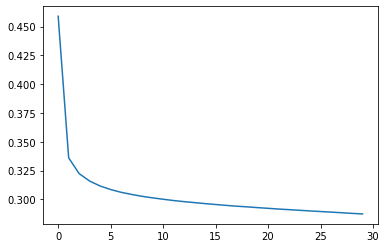

In [294]:
history = pd.DataFrame(model.history.history)
history.loss.plot()

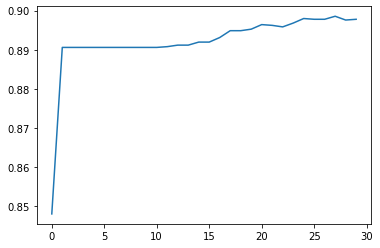

In [295]:
history.accuracy.plot()

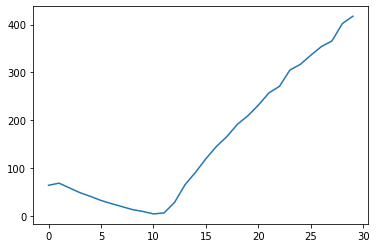

In [296]:
history.val_loss.plot()

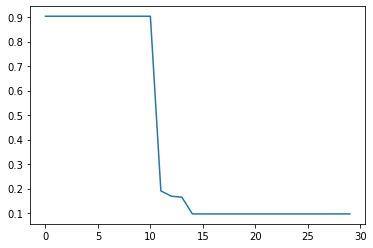

In [297]:
history.val_accuracy.plot()

In [298]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 417.3591 - accuracy: 0.0963


[417.35906982421875, 0.0963480994105339]

# Model - 'Suicide'

In [299]:
X_train_suicide, X_test_suicide, y_train_suicide, y_test_suicide = train_test_split(X_suicide, y_suicide, test_size=0.2, random_state=42)
X_train_suicide = scaler.fit_transform(X_train_suicide)
X_train_suicide.shape

(5146, 12)

In [300]:
history_suicide = model.fit(X_train_suicide, y_train_suicide, epochs=30, validation_data=(X_test_suicide, y_test_suicide))

Epoch 1/30
161/161 [==============================] - 1s 5ms/step - loss: 0.5911 - accuracy: 0.7258 - val_loss: 211.2849 - val_accuracy: 0.8819
Epoch 2/30
161/161 [==============================] - 0s 3ms/step - loss: 0.2721 - accuracy: 0.9001 - val_loss: 235.1016 - val_accuracy: 0.8819
Epoch 3/30
161/161 [==============================] - 1s 4ms/step - loss: 0.2400 - accuracy: 0.9007 - val_loss: 244.7386 - val_accuracy: 0.8819
Epoch 4/30
161/161 [==============================] - 1s 5ms/step - loss: 0.2213 - accuracy: 0.9036 - val_loss: 252.5911 - val_accuracy: 0.8819
Epoch 5/30
161/161 [==============================] - 1s 5ms/step - loss: 0.2079 - accuracy: 0.9054 - val_loss: 254.1705 - val_accuracy: 0.8819
Epoch 6/30
161/161 [==============================] - 1s 4ms/step - loss: 0.1970 - accuracy: 0.9092 - val_loss: 255.8086 - val_accuracy: 0.8819
Epoch 7/30
161/161 [==============================] - 1s 4ms/step - loss: 0.1881 - accuracy: 0.9114 - val_loss: 256.6455 - val_accuracy:

In [301]:
history_suicide = pd.DataFrame(model.history.history)

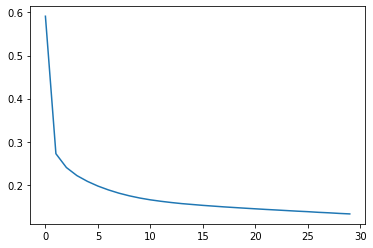

In [302]:
history_suicide.loss.plot()

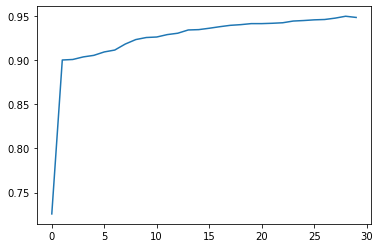

In [303]:
history_suicide.accuracy.plot()

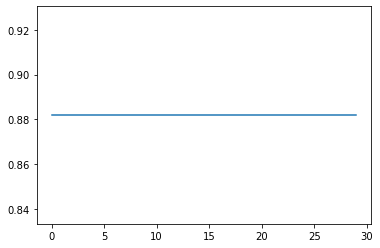

In [304]:
history_suicide.val_accuracy.plot()

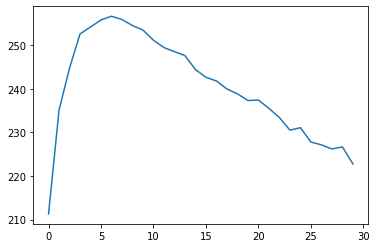

In [305]:
history_suicide.val_loss.plot()

In [306]:
model.evaluate(X_test_suicide, y_test_suicide)

41/41 [==============================] - 0s 2ms/step - loss: 222.7573 - accuracy: 0.8819


[222.75733947753906, 0.881895899772644]

# Model - 'Target type'

In [307]:
taliban['targtype1_txt'].value_counts()

10    2294
7     1339
11    1237
5      801
1      185
2      108
16      91
12      79
14      70
8       58
4       45
13      27
0       25
18      22
6       20
17      10
3        8
9        6
19       5
15       3
Name: targtype1_txt, dtype: int64

In [308]:
shape = X_train.shape
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(20, activation = "softmax"))

In [309]:
X_train_target, X_test_target, y_train_target, y_test_target = train_test_split(X_target, y_target, test_size=0.2, random_state=42)
X_train_target = scaler.fit_transform(X_train_target)
X_train_target.shape
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [310]:
history_target = model.fit(X_train_target, y_train_target, epochs=30, validation_data=(X_test_target, y_test_target))

Epoch 1/30
161/161 [==============================] - 2s 7ms/step - loss: 2.7330 - accuracy: 0.2638 - val_loss: 477.1788 - val_accuracy: 0.3388
Epoch 2/30
161/161 [==============================] - 1s 4ms/step - loss: 1.9193 - accuracy: 0.3999 - val_loss: 555.2888 - val_accuracy: 0.3388
Epoch 3/30
161/161 [==============================] - 1s 4ms/step - loss: 1.7275 - accuracy: 0.4382 - val_loss: 530.6830 - val_accuracy: 0.3388
Epoch 4/30
161/161 [==============================] - 1s 5ms/step - loss: 1.6845 - accuracy: 0.4405 - val_loss: 517.9877 - val_accuracy: 0.4071
Epoch 5/30
161/161 [==============================] - 1s 3ms/step - loss: 1.6596 - accuracy: 0.4350 - val_loss: 485.7796 - val_accuracy: 0.4079
Epoch 6/30
161/161 [==============================] - 1s 5ms/step - loss: 1.6797 - accuracy: 0.4478 - val_loss: 504.6544 - val_accuracy: 0.2176
Epoch 7/30
161/161 [==============================] - 1s 4ms/step - loss: 1.6102 - accuracy: 0.4528 - val_loss: 488.3482 - val_accuracy:

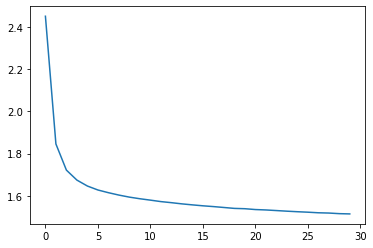

In [311]:
history_target = pd.DataFrame(model.history.history)
history_target.loss.plot()

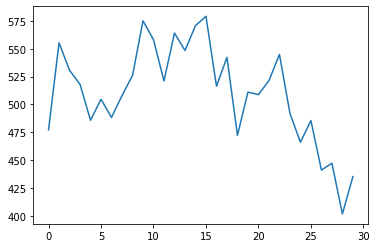

In [312]:
history_target.val_loss.plot()

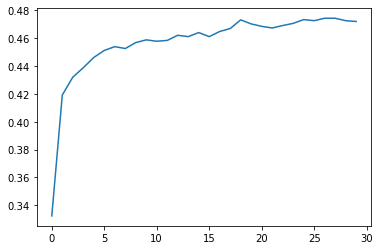

In [313]:
history_target.accuracy.plot()

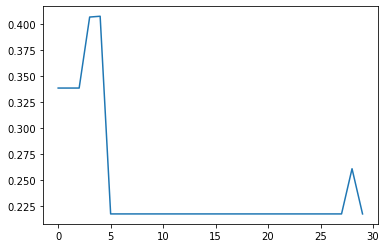

In [314]:
history_target.val_accuracy.plot()

In [315]:
model.evaluate(X_test_target, y_test_target)

41/41 [==============================] - 0s 1ms/step - loss: 435.2373 - accuracy: 0.2176


[435.2373352050781, 0.21756021678447723]